# Aula de Deep Learning - Parte 1

## O que é uma Rede Neural?

Uma rede neural simples pode ser comparada a uma função de regressão linear. Como exemplo, se quisermos predizer o valor de uma casa baseado no tamanho e no número de quartos da mesma, pode-se construir uma rede neural simples com apenas um neurônio, que recebe tamanho e # quartos como entrada, computa através de uma função linear e retorna como output o preço:

<img src="Um-neuron.png" alt="drawing" width="500"/>

> *Rede de um único neurônio é chamada de Perceptron*

Uma rede mais complexa seria como o exemplo abaixo adicionando mais valores de entrada e neurônios na camada intermediária (chamada de hidden Layer  ou camada oculta):
    
<img src="rede-complexa.png" alt="drawing" width="650"/>


Na prática precisamos apenas definir as variáveis de entrada (X) e dizer qual a saída para cada exemplo. Todos os neurônios de entrada são ligados aos neurônios da camada oculta. A relação entre as variáveis, ou seja, os pesos, é o que a rede vai aprender.

![](https://matthewmazur.files.wordpress.com/2018/03/neural_network-7.png?w=525)

Nessa figura temos 2 neurônios na camada de entrada (2 variáveis de entrada), 2 na camada oculta e 2 na camada de saída (2 classes como resultado). Essa rede irá aprender 8 pesos (*w*) e 4 bias (*b*)

>\*Definição alternativa: As Redes Neurais Artificiais são baseadas na biologia, tendo como unidade principal o neurônio artificial, que simula o comportamento do neurônio biológico. No modelo computacional de um neurônio, os sinais interagem entre os neurônios, de acordo com o peso dado à relação entre eles (ou seja, cada aresta ligando um neurônio ao outro possui um peso w). A ideia é que os pesos sejam aprendidos e controlem a força de influência de um neurônio em outro. Essa interação é modelada por uma função, que geralmente assume a forma de uma soma ponderada.


**VAMOS A PRÁTICA!**

## Preparando os dados

Vamos criar uma rede neural simples para prever *churn* de clientes. 

Vamos começar pela leitura dos dados:

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [4]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [5]:
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

Para este exemplo vamos fazer um tratamento simples dos dados, apenas convertendo as variáveis categoricas em dummies:

In [6]:
df = pd.get_dummies(df, columns=['Geography', 'Gender'])
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Age', 'Tenure',
       'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited', 'Geography_France', 'Geography_Germany',
       'Geography_Spain', 'Gender_Female', 'Gender_Male'],
      dtype='object')

Vamos separar os dados de teste e treinamento:

In [7]:
X = df[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember','EstimatedSalary', 
        'Geography_France', 'Geography_Germany', 'Geography_Spain', 'Gender_Female']]

y = df['Exited']

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X , y, test_size = 0.1)
X_train, X_val, y_train, y_val = train_test_split(X , y, test_size = 0.1)

print(X_train.shape)

(9000, 12)


In [9]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_val = sc.transform(X_val)

/home/jessica/workspace/apresentacoes/venv/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/jessica/workspace/apresentacoes/venv/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/jessica/workspace/apresentacoes/venv/lib/python3.6/site-packages/ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.
/home/jessica/workspace/apresentacoes/venv/lib/python3.6/site-packages/ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  """


## Construindo o modelo

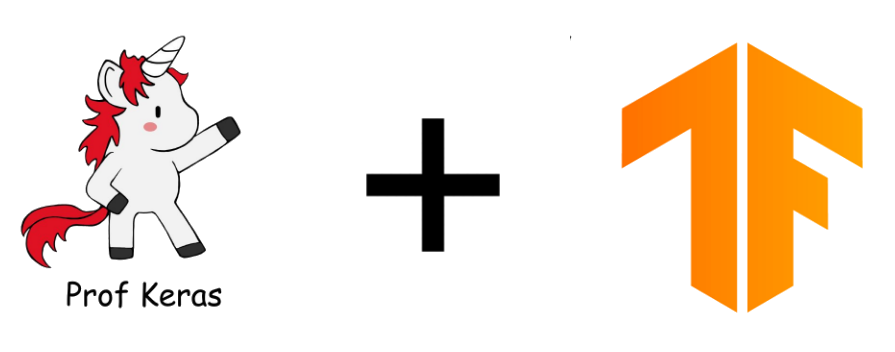

Agora com o dados prontos vamos montar a nossa rede neural. Vamos usar a library [Keras](https://keras.io) rodando em cima do [TensorFlow](https://tensorflow.org/)


1. Definição da arquitetura

2. Compilação

3. Treinamento

4. Avaliação

### 1. Definição da arquitetura: 
Definir a arquitetura da rede

In [10]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

Using TensorFlow backend.


In [21]:
def build_model():
    model = Sequential()
    
    # primeira camada adiciona o shape do input
    # adiciona a funcao de ativacao
    # quantidade de units (neurônios)
    # também é possível alterar a inicializacao, bias, entre outros -- https://keras.io/layers/core/
    model.add(Dense(units=10, input_dim=12, activation='relu'))
    model.add(Dense(10, activation='relu'))
    
    #Camada de saida com o resultado de 1 classe e a ativação sigmoid -- outras funções de ativação: https://keras.io/activations/
    model.add(Dense(1, activation='sigmoid'))
    return model

> **Como é a arquitetura do modelo definido acima?**
> - 



### Vamos entender melhor as funções de ativação:

Em cada neurônio da rede há uma função de ativação, que decide se o neurônio deve ser *ativado*, e transmitir informações para a próxima camada.

![](https://i1.wp.com/deeplearningbook.com.br/wp-content/uploads/2018/02/act.png?w=406)

A função mais comum nas camadas intermediárias é a relu:

![](https://cdn-images-1.medium.com/max/937/1*oePAhrm74RNnNEolprmTaQ.png)

Na camada de saída a rede precisa nos retornar a probabilidade do cliente fazer o cancelamento.

Por ser uma probabilidade (de 0 a 1), nós usamos a função sigmoid:

![as vezes a função sigmóide é simplesmente representada pela curva S](https://sabedoriararefeita.files.wordpress.com/2016/02/ann_sigmoid.png?w=615)


Outras funções comuns:

Softmax -> Usada na camada de output para problemas de multiclasse, a soma das probabilidades de todas as classes dará 1.

elu -> para ser usada nas camadas intermediarias no lugar da relu, uma exponencial é aplicada nos valores menores que 0.

> Em regressão não há função de ativação na camada de output

outras funções de ativação: https://keras.io/activations/
explicações extras: http://deeplearningbook.com.br/funcao-de-ativacao/

In [22]:
model = build_model()

In [23]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 10)                130       
_________________________________________________________________
dense_5 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 11        
Total params: 251
Trainable params: 251
Non-trainable params: 0
_________________________________________________________________


> **Por que temos 130 parâmetros na primeira camada?**
> - 



> Podemos ver que na primeira camada 130 parâmetros (pesos) serão aprendidos ((12 inputs x 10 layers) + (1 bias * 10 layers))

### 2. Compilar o modelo:

Definer como a rede irá aprender. Qual o otimizador com os parâmetros de learning rate, função e parametros específicos da função e a loss function.


In [24]:
# outras funções de loss: https://keras.io/losses/
# outros optimizers: https://keras.io/optimizers/
adam = Adam(lr=0.01)
model.compile(loss='binary_crossentropy', 
             optimizer=adam,
             metrics=['accuracy'])

### Vamos entender como a rede aprende:

Para aprender os parâmetros $w$ e $b$ é preciso uma **função de custo**. Primeiro, vamos definir uma função de perda ou $Loss Function$ de modo que quanto mais próximo da resposta certa, menor seja o valor dessa função:

$L(\hat{y},y)=-(y\log{\hat{y}} + (1-y)\log{(1-\hat{y})})$ (binary_crossentropy)

> Se uma instância tem label 1, então $(1-y)$ é $0$, deixando apenas o lado esquerdo da equação. Pra que ele seja o menor possível, $\hat{y}$ precisa ser o maior possível, no caso o mais próximo de 1. O oposto também se aplica para quando o label é 0.

Com isso, temos a funcão de custo:

$J(w,b)=\frac{1}{m}\sum_{i=1}^{m}L(\hat{y}^i,y^i)$

Dado nosso custo, queremos encontrar $w$ e $b$ que minimize esse custo. Para isso utilizamos o **Gradiente Descendente**. A função de custo é uma funcão convexa, como uma bacia, então o que o gradiente faz é ir descendo o mais rápido possível até chegar no fundo da bacia, no menor ponto, independente do ponto inicial.

![enter image description here](https://blog.paperspace.com/content/images/2018/05/68747470733a2f2f707669676965722e6769746875622e696f2f6d656469612f696d672f70617274312f6772616469656e745f64657363656e742e676966.gif)

Para fazer essa "decida", utilizaremos a derivada do custo e uma taxa de aprendizado ou *learning rate*, da seguinte forma:

A cada iteração do algoritmo temos $w = w - \alpha \frac{\mathrm{d}J}{\mathrm{d}w}$, sendo $\alpha$ o learning rate.

De modo geral, atualizamos w e b a cada iteração, sendo a velocidade controlada pelo learning rate, até chegarmos no ponto mínimo de custo.

**Mas o que é o Adam então?**

Algoritmo de otimização da taxa de aprendizado adaptável que foi projetado especificamente para o treinamento de redes neurais profundas, pode ser usado em vez do procedimento clássico de descida de gradiente estocástico (SGD) para atualizar os pesos da rede de forma iterativa com base nos dados de treinamento.

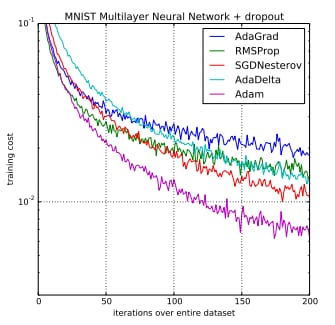


Mais informações: [artigo original](https://arxiv.org/abs/1412.6980), [post explicativo](https://towardsdatascience.com/adam-latest-trends-in-deep-learning-optimization-6be9a291375c), [outros otimizadores](http://ruder.io/optimizing-gradient-descent/)



> **Importante**: quando estiverem fazendo experimentos com NN, testem com SGD e Adam e com diferentes **LEARNING RATES**.


### 3. Treinamento

In [25]:
model.fit(x=X_train, y=y_train, validation_data=(X_val,y_val), batch_size=16, epochs=10)

Train on 9000 samples, validate on 1000 samples
Epoch 1/10
9000/9000 [==============================] - 1s 98us/step - loss: 0.4033 - acc: 0.8283 - val_loss: 0.3512 - val_acc: 0.8580
Epoch 2/10
9000/9000 [==============================] - 1s 84us/step - loss: 0.3544 - acc: 0.8537 - val_loss: 0.3546 - val_acc: 0.8450
Epoch 3/10
9000/9000 [==============================] - 1s 107us/step - loss: 0.3478 - acc: 0.8562 - val_loss: 0.3370 - val_acc: 0.8630
Epoch 4/10
9000/9000 [==============================] - 1s 84us/step - loss: 0.3451 - acc: 0.8571 - val_loss: 0.3502 - val_acc: 0.8480
Epoch 5/10
9000/9000 [==============================] - 1s 77us/step - loss: 0.3436 - acc: 0.8594 - val_loss: 0.3442 - val_acc: 0.8630
Epoch 6/10
9000/9000 [==============================] - 1s 110us/step - loss: 0.3402 - acc: 0.8601 - val_loss: 0.3433 - val_acc: 0.8570
Epoch 7/10
9000/9000 [==============================] - 2s 198us/step - loss: 0.3395 - acc: 0.8600 - val_loss: 0.3413 - val_acc: 0.8610
Epoc

> Percebemos que só com 10 épocas a rede ainda não tinha convergido, o loss ainda estava caindo, então poderíamos treinar por mais épocas!

Temos dois parâmetros importantes no treinamento:
- Número de épocas: Quantas vezes a rede vai passar por todos as instâncias
- Tamanho do batch: Qual o tamanho do bloco que ela vai usar, ou seja, quantas instâncias por vez passarão pela rede


### 4. Avaliação

In [27]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

In [32]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [33]:
accuracy_score(y_test, y_pred)

0.883

In [34]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[798  13]
 [104  85]]


## Por que o crescimento de Deep Learning?

<img src="https://kevinzakka.github.io/assets/app_dl/perf_vs_data.png" alt="drawing" width="600"/>

Algoritmos tradicionais tendem a estabilizar a performance apartir de uma certa quantidade de dados, enquanto redes neurais tendem a ficar cada vez melhores quanto mais dados são utilizados para o aprendizado.

Portanto, o principal motivo que faz com que as NN cresçam nos últimos anos é o grande aumento na quantidade de **dados** disponíveis.  Além disso, o poder **computacional** também é muito maior nos dias atuais, principalmente com a utilização de GPU's. O que também permitiu o desenvolvimento de **algoritmos** mais complexos e potentes.


Neural Networks, mais especificamente Deep Learning, tem grande aplicações em datas não-estruturados, como: Imagens, Aúdios e Textos.